# Predicting Crime Using Demographics: An Exploratory Data Analysis (EDA) 

Here, we are going to try and predict crime rates for a given ZCTA (which closely aligns with USPS zip codes as of 2020) within the United States. This will not only help us predict crime rates, but by building a highly interpretable linear model, we can get undeaneath the problem of crime and try and assess what might be driving it, and in what proportion. Is it poverty? Inequality? Crime? Demographic information? These questions hopefully will be answered over the course of this analysis. But first, we must prepare the data for this analysis which comes later. 

The data was sourced from the following sources: 

- https://crimegrade.org/ - This was what we used to obtain the zip-code level crime data. Note that an algorithmic approach is taken to assess crime in Zip codes that don't report crime, so essentially we may be "predicting a prediction" - but nonetheless it is the best dataset available given these constraints. It also doesn't specify what time period this data is from.
- https://console.cloud.google.com/marketplace/product/united-states-census-bureau/us-census-data?project=datarobot-vertex-pipelines - This is a compilation created by Google of publically available census data, which previously was spread out and very hard to aggregate manually. Luckily Google has done much of the hard work for us and created a very wide dataset (nearly 245 columns) for analysis at the ZCTA level. This is "5-year" data and labeled as 2020 level, so we assum that these are five year statistics ending in 2020.

We will ultimately join this data together on ZCTA and perform our EDA. 

### Import Dependencies

First, let's import some basic libraries like Pandas and NumPy, as well as some graphing libraries like Seaborn and Matplotlib. This should give us the "tools" we need. 

In [655]:
# Import dependencies
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

# Set the maximum number of rows and columns to display
pd.set_option('display.max_rows', None)  # None means unlimited
pd.set_option('display.max_columns', None)  # None means unlimited

### Read in Data 

Let's read in the data from our CSV file. 

In [656]:
df = pd.read_csv('data/zcta_2020_5yr.csv') # Read in the data 

### Assess Rows and Columns

What is the shape of our dataset? 

In [657]:
df.shape # Get row and column counts 

(33120, 245)

### Explore Dataset Head 

Let's take a look at the "head" of our dataset to get a feel for the columns and their values. 

In [658]:
df.head(10) # Display the first 10 rows to assess columns

,geo_id,aggregate_travel_time_to_work,amerindian_including_hispanic,amerindian_pop,armed_forces,asian_including_hispanic,asian_male_45_54,asian_male_55_64,asian_pop,associates_degree,bachelors_degree,bachelors_degree_2,bachelors_degree_or_higher_25_64,black_including_hispanic,black_male_45_54,black_male_55_64,black_pop,children,children_in_single_female_hh,civilian_labor_force,commute_10_14_mins,commute_15_19_mins,commute_20_24_mins,commute_25_29_mins,commute_30_34_mins,commute_35_39_mins,commute_35_44_mins,commute_40_44_mins,commute_45_59_mins,commute_5_9_mins,commute_60_89_mins,commute_60_more_mins,commute_90_more_mins,commute_less_10_mins,commuters_16_over,commuters_by_bus,commuters_by_car_truck_van,commuters_by_carpool,commuters_by_public_transportation,commuters_by_subway_or_elevated,commuters_drove_alone,different_house_year_ago_different_city,different_house_year_ago_same_city,dwellings_10_to_19_units,dwellings_1_units_attached,dwellings_1_units_detached,dwellings_20_to_49_units,dwellings_2_units,dwellings_3_to_4_units,dwellings_50_or_more_units,dwellings_5_to_9_units,employed_agriculture_forestry_fishing_hunting_mining,employed_arts_entertainment_recreation_accommodation_food,employed_construction,employed_education_health_social,employed_finance_insurance_real_estate,employed_information,employed_manufacturing,employed_other_services_not_public_admin,employed_pop,employed_public_administration,employed_retail_trade,employed_science_management_admin_waste,employed_transportation_warehousing_utilities,employed_wholesale_trade,families_with_young_children,family_households,father_in_labor_force_one_parent_families_with_young_children,father_one_parent_families_with_young_children,female_10_to_14,female_15_to_17,female_18_to_19,female_20,female_21,female_22_to_24,female_25_to_29,female_30_to_34,female_35_to_39,female_40_to_44,female_45_to_49,female_50_to_54,female_55_to_59,female_5_to_9,female_60_to_61,female_62_to_64,female_65_to_66,female_67_to_69,female_70_to_74,female_75_to_79,female_80_to_84,female_85_and_over,female_female_households,female_pop,female_under_5,four_more_cars,gini_index,graduate_professional_degree,group_quarters,high_school_diploma,high_school_including_ged,hispanic_any_race,hispanic_male_45_54,hispanic_male_55_64,hispanic_pop,households,households_public_asst_or_food_stamps,households_retirement_income,housing_built_1939_or_earlier,housing_built_2000_to_2004,housing_built_2005_or_later,housing_units,housing_units_renter_occupied,in_grades_1_to_4,in_grades_5_to_8,in_grades_9_to_12,in_school,in_undergrad_college,income_100000_124999,income_10000_14999,income_125000_149999,income_150000_199999,income_15000_19999,income_200000_or_more,income_20000_24999,income_25000_29999,income_30000_34999,income_35000_39999,income_40000_44999,income_45000_49999,income_50000_59999,income_60000_74999,income_75000_99999,income_less_10000,income_per_capita,less_one_year_college,less_than_high_school_graduate,male_10_to_14,male_15_to_17,male_18_to_19,male_20,male_21,male_22_to_24,male_25_to_29,male_30_to_34,male_35_to_39,male_40_to_44,male_45_64_associates_degree,male_45_64_bachelors_degree,male_45_64_grade_9_12,male_45_64_graduate_degree,male_45_64_high_school,male_45_64_less_than_9_grade,male_45_64_some_college,male_45_to_49,male_45_to_64,male_50_to_54,male_55_to_59,male_5_to_9,male_60_to_61,male_62_to_64,male_65_to_66,male_67_to_69,male_70_to_74,male_75_to_79,male_80_to_84,male_85_and_over,male_male_households,male_pop,male_under_5,management_business_sci_arts_employed,married_households,masters_degree,median_age,median_income,median_rent,median_year_structure_built,million_dollar_housing_units,mobile_homes,mortgaged_housing_units,no_car,no_cars,nonfamily_households,not_hispanic_pop,not_in_labor_force,not_us_citizen_pop,occupation_management_arts,occupation_natural_resources_construction_maintenance,occupation_production_transportation_material,occupation_sales_office,occupation_services,occupied_housing_units,one_car,o

### Assess Null Counts

How much of the data is missing for all these columns? We want to figure out what has meaningful information and what doesn't. 

In [659]:
df.isnull().sum().sort_values(ascending=False) # Get null counts per column 

pop_5_years_over                                                  33120
female_female_households                                          33120
male_male_households                                              33120
speak_only_english_at_home                                        33120
speak_spanish_at_home                                             33120
speak_spanish_at_home_low_english                                 33120
hispanic_male_45_54                                               27840
commuters_by_carpool                                              26720
income_10000_14999                                                21440
bachelors_degree                                                  20320
nonfamily_households                                              15040
housing_built_2005_or_later                                       13920
aggregate_travel_time_to_work                                     13085
employed_other_services_not_public_admin                        

### Dealing with null values

Some columns are almost entirely null, if not entirely null - these contain no useful information and therefore can be dropped from the dataset and excluded from our analysis. 

In [660]:
# Get the null count for each column, sort them in descending order, and take the top 14
# Drop up to / including "employed_other_services_not_public_admin"
null_counts = df.isnull().sum().sort_values(ascending=False).head(14) 

# Get the column names of the top 15 columns with the most missing values
columns_to_drop = null_counts.index.tolist()

# Drop these columns from the DataFrame
df_top_nulls_dropped = df.drop(columns=columns_to_drop)

# Now let's check null counts again
df_top_nulls_dropped.isnull().sum().sort_values(ascending=False) # Get null counts per column 

female_20                                                         1120
income_per_capita                                                  330
bachelors_degree_2                                                 131
not_us_citizen_pop                                                 131
some_college_and_associates_degree                                 131
population_1_year_and_over                                         131
different_house_year_ago_different_city                            131
graduate_professional_degree                                       131
less_than_high_school_graduate                                     131
different_house_year_ago_same_city                                 131
high_school_including_ged                                          131
male_67_to_69                                                        0
male_75_to_79                                                        0
male_70_to_74                                                        0
geo_id

### Normalize on Total Population and Households - A Few Checks First...

Much better. We'll figure out how to impute the missing values later on. 

I did notice a "total_pop" column in the dataframe - does this provide us the "scale" of our data?

I also noticed "households" - should some things (like count of million dollar homes) be a percentage of overall households? 

Are various things at different scales? The numbers don't seem like percentages. Let's do a few  checks to confirm this. 

First, I want to see if any values within a column are greater than the total pop for that given row - any at all. If even one value is greater than the total pop, this would lead us to believe this is not a "count" out of the total population. Let's check this with some rather complex logic. 

Check to see if any values are larger than total pop - if even one value in the column is larger than total pop, it is probably on a different scale, and that's a red flag. 

In [661]:
# Total Population is our reference column
reference_column = 'total_pop'

# Create a dictionary to hold the result for each column
comparison_results = {}

# Iterate over all columns and perform the comparison
for col in df_top_nulls_dropped.columns:
    if col != reference_column:  # Skip the reference column itself
        
        # Check if any value in the current column is greater than the reference column (row-wise comparison)
        comparison_results[col] = df_top_nulls_dropped[col].gt(df_top_nulls_dropped[reference_column]).any()

# Convert the dictionary to a list of columns with True if they have at least one value greater than the reference column
columns_greater_than_reference = [col for col, is_greater in comparison_results.items() if is_greater]

# Get a complete list of True/False for each column
full_comparison_list = [f"{col}: {'True' if is_greater else 'False'}" for col, is_greater in comparison_results.items()]

# Convert to dataframe to view results
comparison_df = pd.DataFrame(list(comparison_results.items()), columns=['Column', 'IsGreater'])

print(comparison_df)

                                                Column  IsGreater
0                                               geo_id       True
1                        amerindian_including_hispanic      False
2                                       amerindian_pop      False
3                                         armed_forces      False
4                             asian_including_hispanic      False
5                                     asian_male_45_54      False
6                                     asian_male_55_64      False
7                                            asian_pop      False
8                                    associates_degree      False
9                                   bachelors_degree_2      False
10                    bachelors_degree_or_higher_25_64      False
11                            black_including_hispanic      False
12                                    black_male_45_54      False
13                                    black_male_55_64      False
14        

### Coefficients of Variation - Finding Raw Values vs. Population Counts

This gave us a good idea of which columns are raw values vs. population counts, but it wasn't perfect. 

Let's try another approach. We'll use the coefficient of variation. 

High CV values are likely population counts (since they can go to zero and go very high). Low CV values are probably raw values, like median  income, since they don't vary as much. Let's try this. 

We'll use the data we got previously to assess this theory. 

In [662]:
# Add a "coefficient_of_variation" column with NaN values
comparison_df['coefficient_of_variation'] = None

# Total Population column (you may need to adjust the column name)
total_population_column = 'total_pop'

# Calculate and store CV for each column (excluding the total population column)
for index, row in comparison_df.iterrows():
    col = row['Column']
    if col != total_population_column:
        mean = df_top_nulls_dropped[col].mean()
        std = df_top_nulls_dropped[col].std()
        cv = std / mean if mean != 0 else 0  # Avoid division by zero
        comparison_df.at[index, 'coefficient_of_variation'] = cv

# Sort the DataFrame by the coefficient_of_variation column in ascending order
comparison_df = comparison_df.sort_values(by='IsGreater', ascending=False)

# Display the DataFrame with columns sorted by CV
comparison_df

,Column,IsGreater,coefficient_of_variation
0,geo_id,True,0.555002
189,percent_income_spent_on_rent,True,-2.096042
187,owner_occupied_housing_units_median_value,True,-3.345522
186,owner_occupied_housing_units_lower_value_quartile,True,-2.992632
101,housing_built_1939_or_earlier,True,2.25255
208,renter_occupied_housing_units_paying_cash_medi...,True,-2.008005
102,housing_built_2000_to_2004,True,2.457444
103,housing_units,True,1.398911
47,dwellings_5_to_9_units,True,2.408588
46,dwellings_50_or_more_units,True,4.205324


### Huh? Negative CV Values? 

That's weird...our CV values shouldn't be negative. Let's explore columns where the CV is negative, or, where the value exceends the total population. Maybe this will help us solve our problem by narrowing in on these "weird" columns.  

Let's first isolate these weird columns. 

Then, let's explore one column by creating a histogram - for example, income per capita. 

In [663]:
suspect_columns_df = comparison_df[(comparison_df['IsGreater'] == True) | (comparison_df['coefficient_of_variation'] < 0)]
suspect_columns_df

,Column,IsGreater,coefficient_of_variation
0,geo_id,True,0.555002
189,percent_income_spent_on_rent,True,-2.096042
187,owner_occupied_housing_units_median_value,True,-3.345522
186,owner_occupied_housing_units_lower_value_quartile,True,-2.992632
101,housing_built_1939_or_earlier,True,2.25255
208,renter_occupied_housing_units_paying_cash_medi...,True,-2.008005
102,housing_built_2000_to_2004,True,2.457444
103,housing_units,True,1.398911
47,dwellings_5_to_9_units,True,2.408588
46,dwellings_50_or_more_units,True,4.205324


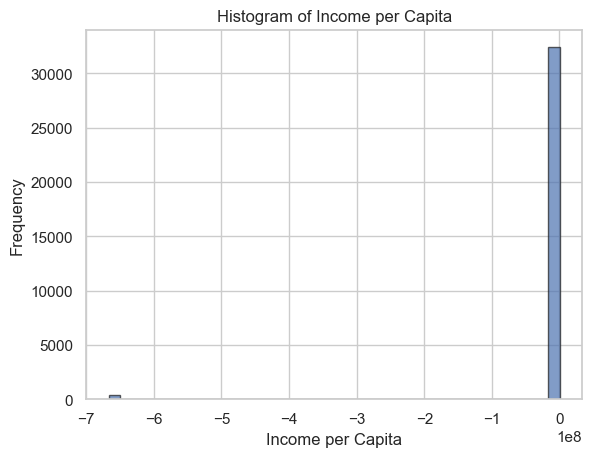

In [664]:
# Create a histogram
plt.hist(df_top_nulls_dropped['income_per_capita'], bins=40, edgecolor='k', alpha=0.7)

# Add labels and a title
plt.xlabel('Income per Capita')
plt.ylabel('Frequency')
plt.title('Histogram of Income per Capita')

# Show the histogram
plt.show()

### Extremely Small -66666 Values Found!

We found some badly coded values by looking at the boxplot - outliers way to the low extreme! Let's confirm this by looking at a summary of the data: 

In [665]:
df_top_nulls_dropped.describe()

,geo_id,amerindian_including_hispanic,amerindian_pop,armed_forces,asian_including_hispanic,asian_male_45_54,asian_male_55_64,asian_pop,associates_degree,bachelors_degree_2,bachelors_degree_or_higher_25_64,black_including_hispanic,black_male_45_54,black_male_55_64,black_pop,children,children_in_single_female_hh,civilian_labor_force,commute_10_14_mins,commute_15_19_mins,commute_20_24_mins,commute_25_29_mins,commute_30_34_mins,commute_35_39_mins,commute_35_44_mins,commute_40_44_mins,commute_45_59_mins,commute_5_9_mins,commute_60_89_mins,commute_60_more_mins,commute_90_more_mins,commute_less_10_mins,commuters_16_over,commuters_by_bus,commuters_by_car_truck_van,commuters_by_public_transportation,commuters_by_subway_or_elevated,commuters_drove_alone,different_house_year_ago_different_city,different_house_year_ago_same_city,dwellings_10_to_19_units,dwellings_1_units_attached,dwellings_1_units_detached,dwellings_20_to_49_units,dwellings_2_units,dwellings_3_to_4_units,dwellings_50_or_more_units,dwellings_5_to_9_units,employed_agriculture_forestry_fishing_hunting_mining,employed_arts_entertainment_recreation_accommodation_food,employed_construction,employed_education_health_social,employed_finance_insurance_real_estate,employed_information,employed_manufacturing,employed_pop,employed_public_administration,employed_retail_trade,employed_science_management_admin_waste,employed_transportation_warehousing_utilities,employed_wholesale_trade,families_with_young_children,family_households,father_in_labor_force_one_parent_families_with_young_children,father_one_parent_families_with_young_children,female_10_to_14,female_15_to_17,female_18_to_19,female_20,female_21,female_22_to_24,female_25_to_29,female_30_to_34,female_35_to_39,female_40_to_44,female_45_to_49,female_50_to_54,female_55_to_59,female_5_to_9,female_60_to_61,female_62_to_64,female_65_to_66,female_67_to_69,female_70_to_74,female_75_to_79,female_80_to_84,female_85_and_over,female_pop,female_under_5,four_more_cars,gini_index,graduate_professional_degree,group_quarters,high_school_diploma,high_school_including_ged,hispanic_any_race,hispanic_male_55_64,hispanic_pop,households,households_public_asst_or_food_stamps,households_retirement_income,housing_built_1939_or_earlier,housing_built_2000_to_2004,housing_units,housing_units_renter_occupied,in_grades_1_to_4,in_grades_5_to_8,in_grades_9_to_12,in_school,in_undergrad_college,income_100000_124999,income_125000_149999,income_150000_199999,income_15000_19999,income_200000_or_more,income_20000_24999,income_25000_29999,income_30000_34999,income_35000_39999,income_40000_44999,income_45000_49999,income_50000_59999,income_60000_74999,income_75000_99999,income_less_10000,income_per_capita,less_one_year_college,less_than_high_school_graduate,male_10_to_14,male_15_to_17,male_18_to_19,male_20,male_21,male_22_to_24,male_25_to_29,male_30_to_34,male_35_to_39,male_40_to_44,male_45_64_associates_degree,male_45_64_bachelors_degree,male_45_64_grade_9_12,male_45_64_graduate_degree,male_45_64_high_school,male_45_64_less_than_9_grade,male_45_64_some_college,male_45_to_49,male_45_to_64,male_50_to_54,male_55_to_59,male_5_to_9,male_60_to_61,male_62_to_64,male_65_to_66,male_67_to_69,male_70_to_74,male_75_to_79,male_80_to_84,male_85_and_over,male_pop,male_under_5,management_business_sci_arts_employed,married_households,masters_degree,median_age,median_income,median_rent,median_year_structure_built,million_dollar_housing_units,mobile_homes,mortgaged_housing_units,no_car,no_cars,not_hispanic_pop,not_in_labor_force,not_us_citizen_pop,occupation_management_arts,occupation_natural_resources_construction_maintenance,occupation_production_transportation_material,occupation_sales_office,occupation_services,occupied_housing_units,one_car,one_parent_families_with_young_children,one_year_more_college,other_race_pop,owner_occupied_housing_units,owner_occupied_housing_units_lower_value_quartile,owner_occupied_housing_units_median_value,owner_occupied_housing_units_upper_value_quart

### Now, Drop Negative Values - Check Again 

It looks like there's extreme values to the downside! In various columns as well!

But we don't really see extreme values to the upside. Let's check our boxplot again after dropping the negative values

In [666]:
# Drop rows with negative values
df_top_nulls_dropped = df_top_nulls_dropped[df_top_nulls_dropped >= 0].dropna()

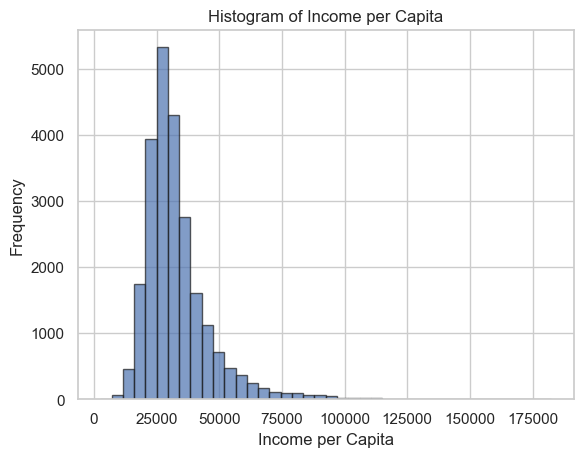

In [667]:
# Create a histogram
plt.hist(df_top_nulls_dropped['income_per_capita'], bins=40, edgecolor='k', alpha=0.7)

# Add labels and a title
plt.xlabel('Income per Capita')
plt.ylabel('Frequency')
plt.title('Histogram of Income per Capita')

# Show the histogram
plt.show()

### Much Better...Let's Proceed! (Oh Yeah...and Let's Check that CV Thing...) 

Now, this distribution looks much more "normal" (albeit with a right skew...no pun intended). 

The only problem now is, our variables are still on different scales. Remember, ultimately we're going to try and predict crime "rate", as a percentage of crime in an area.

We want to control for population size. We're asking the question - controlling for size, what demographics or characteristics of an area are "predictive" of higher crime? Correlation doesn't imply causation, but this is our hypothesis. 

To do this let's get everything on a percentage scale. We'll do the following: 

- For things at the person level, divide by total population
- For things at the household level, divide by total households

Let us proceed!

Oh yeah, and what about that CV idea we had? Do raw values really have a lower coefficient of variation? Let's check first!

In [668]:
# Total Population is our reference column
reference_column = 'total_pop'

# Create a dictionary to hold the result for each column
comparison_results = {}

# Iterate over all columns and perform the comparison
for col in df_top_nulls_dropped.columns:
    if col != reference_column:  # Skip the reference column itself
        
        # Check if any value in the current column is greater than the reference column (row-wise comparison)
        comparison_results[col] = df_top_nulls_dropped[col].gt(df_top_nulls_dropped[reference_column]).any()

# Convert the dictionary to a list of columns with True if they have at least one value greater than the reference column
columns_greater_than_reference = [col for col, is_greater in comparison_results.items() if is_greater]

# Get a complete list of True/False for each column
full_comparison_list = [f"{col}: {'True' if is_greater else 'False'}" for col, is_greater in comparison_results.items()]

# Convert to dataframe to view results
comparison_df = pd.DataFrame(list(comparison_results.items()), columns=['Column', 'IsGreater'])

# Add a "coefficient_of_variation" column with NaN values
comparison_df['coefficient_of_variation'] = None

# Total Population column (you may need to adjust the column name)
total_population_column = 'total_pop'

# Calculate and store CV for each column (excluding the total population column)
for index, row in comparison_df.iterrows():
    col = row['Column']
    if col != total_population_column:
        mean = df_top_nulls_dropped[col].mean()
        std = df_top_nulls_dropped[col].std()
        cv = std / mean if mean != 0 else 0  # Avoid division by zero
        comparison_df.at[index, 'coefficient_of_variation'] = cv

# Sort the DataFrame by the coefficient_of_variation column in ascending order
comparison_df = comparison_df.sort_values(by='coefficient_of_variation', ascending=True)

# Display the DataFrame with columns sorted by CV
comparison_df

,Column,IsGreater,coefficient_of_variation
90,gini_index,False,0.139141
163,median_age,True,0.177452
166,median_year_structure_built,True,0.199543
189,percent_income_spent_on_rent,False,0.274631
164,median_income,True,0.404799
125,income_per_capita,True,0.417773
208,renter_occupied_housing_units_paying_cash_medi...,True,0.42958
165,median_rent,True,0.537305
0,geo_id,True,0.553318
188,owner_occupied_housing_units_upper_value_quartile,True,0.812015


### It Looks Like They Do! (Trues at the Top) 

The True values are coming up at the top! These are values where the max exceeds the total pop max. Notice the coefficient of variation is also really low. It's not perfect, but its a decent heuristic. So our idea wasn't too far off!

Now, let's proceed to group the columns as we discussed earlier: 

- Things to divide by total population (population-level metrics)
- Things to divide by total households (household-level metrics)
- Things to leave alone (things like median income, gini coefficient, etc.) 

In [669]:
raw_cols = [
    'geo_id', 
    'gini_index', 
    'income_per_capita',
    'median_age',
    'median_income',
    'median_rent',
    'median_year_structure_built',
    'owner_occupied_housing_units_lower_value_quartile',
    'owner_occupied_housing_units_median_value',
    'owner_occupied_housing_units_upper_value_quartile',
    'percent_income_spent_on_rent',
    'renter_occupied_housing_units_paying_cash_median_gross_rent', 
    'total_pop', 
    'occupied_housing_units'
]

household_cols = [
    'dwellings_1_units_attached',
    'dwellings_1_units_detached',
    'dwellings_2_units',
    'dwellings_3_to_4_units',
    'dwellings_5_to_9_units',
    'dwellings_10_to_19_units',
    'dwellings_20_to_49_units',
    'dwellings_50_or_more_units',
    'housing_units',
    'housing_units_renter_occupied',
    'housing_built_1939_or_earlier',
    'housing_built_2000_to_2004',
    'million_dollar_housing_units',
    'mobile_homes',
    'mortgaged_housing_units',
    'owner_occupied_housing_units',
    'vacant_housing_units',
    'vacant_housing_units_for_rent',
    'vacant_housing_units_for_sale',
    'families_with_young_children', 
    'family_households',
    'four_more_cars', 
    'group_quarters',
    'households_public_asst_or_food_stamps',
    'households_retirement_income',
    'housing_built_1939_or_earlier',
    'housing_built_2000_to_2004',
    'housing_units',
    'housing_units_renter_occupied',
    'married_households',
    'no_car',
    'no_cars',
    'one_car',
    'one_parent_families_with_young_children',
    'three_cars',
    'two_cars',
    'two_parent_families_with_young_children',
    'two_parents_father_in_labor_force_families_with_young_children',
    'two_parents_in_labor_force_families_with_young_children',
    'two_parents_mother_in_labor_force_families_with_young_children',
    'two_parents_not_in_labor_force_families_with_young_children', 
    'father_in_labor_force_one_parent_families_with_young_children',
    'father_one_parent_families_with_young_children'
]

# Deduplicate and return clean lists
raw_cols = list(set(raw_cols))
household_cols = list(set(household_cols))

In [670]:
# Get all column
cols = list(df_top_nulls_dropped)

# Get the population columns by dropping household and raw columns from all columns
pop_cols = [x for x in cols if x not in raw_cols and x not in household_cols]

In [671]:
# Divide population columns by total population 
df_top_nulls_dropped[pop_cols] = df_top_nulls_dropped[pop_cols].div(df['total_pop'], axis=0)

# Divide household columns by total households 
df_top_nulls_dropped[household_cols] = df_top_nulls_dropped[household_cols].div(df['households'], axis=0)

### A Clean Dataset! (Maybe? Almost?) 

Alright, now we should have a clean dataset! We identified and removed extremely low values, and adjusted everything so its either at the raw value level, population level, or household level. We didn't see any extreme values to the upside either when we looked at the max values. So we should be good to go. 

But to be sure, let's explore the data in more detail. Let's dive in!

### Two-Variable Associations

First, since we have so many variables (over 200!) let's do a two-variable correlation analysis. Let's see what variables are highly correlated with one another. Let's do this with just a subset of columns so it isn't overwhelming. 

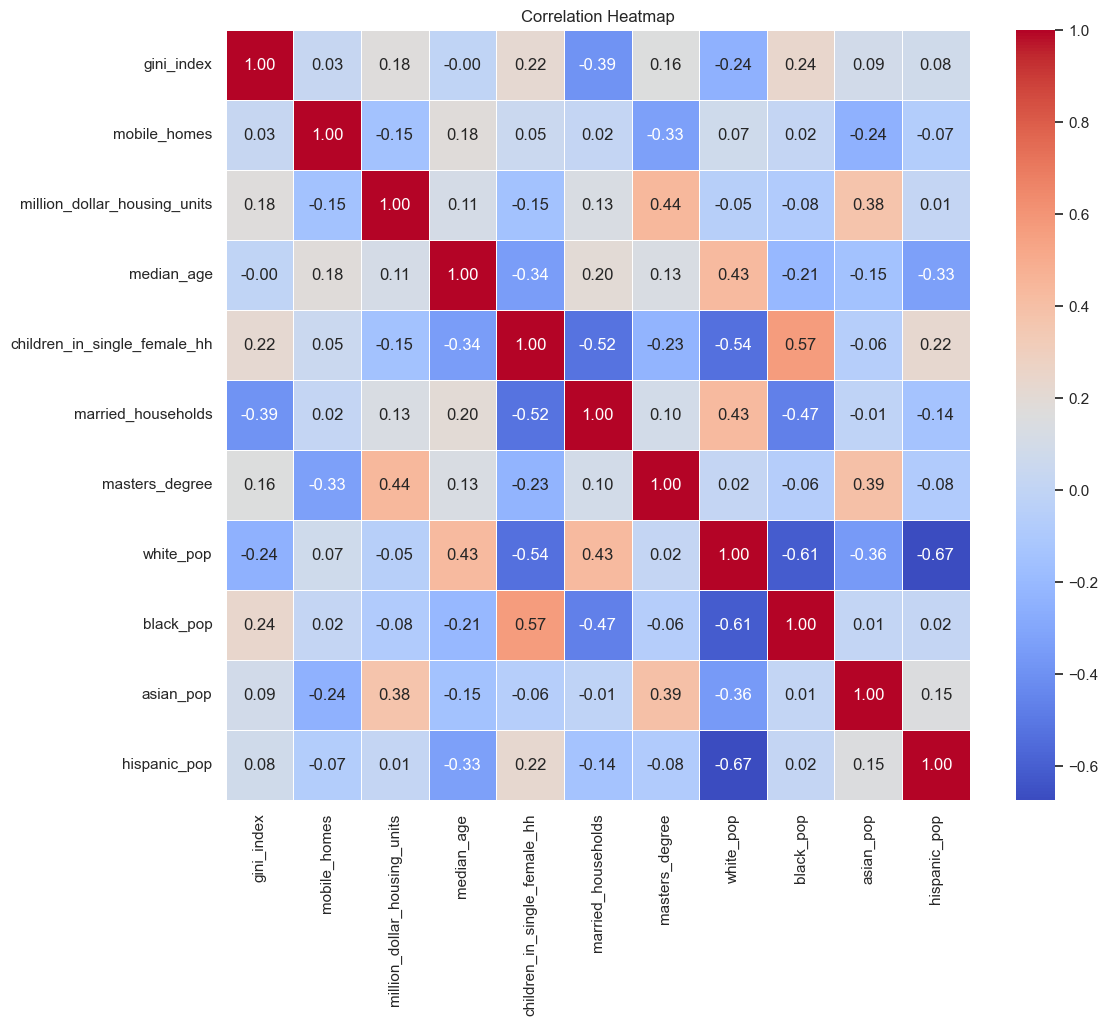

In [672]:
# Select cols for two-variable association (correlation matrix) 
association_cols = ['gini_index','mobile_homes','million_dollar_housing_units','median_age',
                    'children_in_single_female_hh','married_households','masters_degree','white_pop','black_pop', 'asian_pop', 
                    'hispanic_pop']

# Calculate the correlation matrix
correlation_matrix = df_top_nulls_dropped[association_cols].corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap using Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Customize the plot (optional)
plt.title('Correlation Heatmap')
plt.xticks(rotation=90)
plt.yticks(rotation=0)

# Show the plot
plt.show()

### A Few Squares Have High Correlations...

- Having a masters degree is correlated with the proportion of million dollar housing units
- The white population proportion is correlated with proportion of married households
- The black population proportion is correlated witih children in single female households
- The median age is correlated with the white population proportion
- The proportion of asian population is associated with proportion of million dollar homes
- The proportion of masters degrees is associated with the proportion of asian population

Interestingly enough nothing is super correlated with the gini index of inequality. Even mobile homes (one end of the extreme) and million dollar homes (on the other end of the extreme) don't correalte that much. The gini index is most correlated with the proportion of population that is black. 

### Now, Kernel Density Plots of Income 

Let's see how income is distributed across the spectrum! To do this we're going to use overlapping kernel density plots to easily see how the distributions are different for the different income brackets. 

We'll pick three or four for starters. 

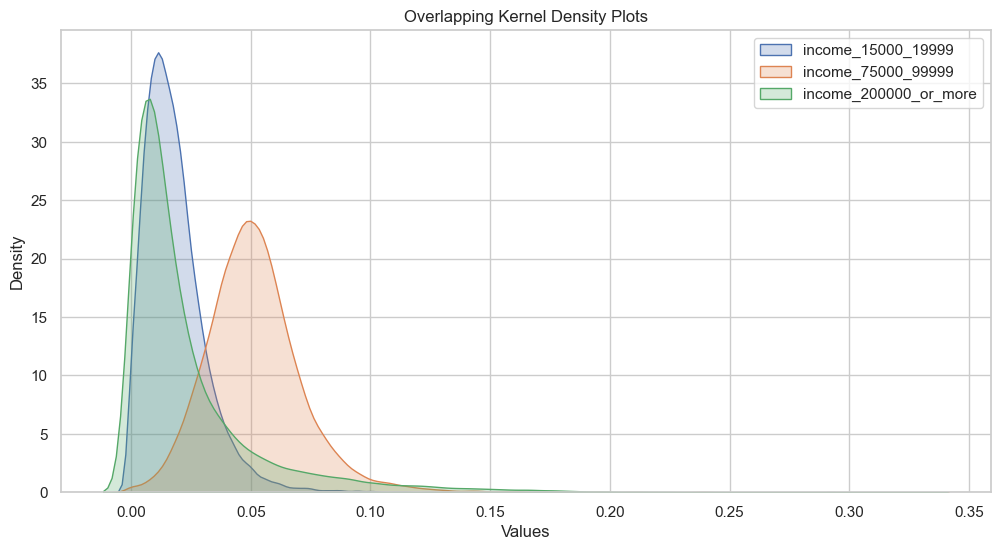

In [673]:
# Pick the columns to plot 
columns_to_plot = ['income_15000_19999', 'income_75000_99999', 'income_200000_or_more']

# Create a figure and axis for the plot
plt.figure(figsize=(12, 6))

# Loop through the selected columns and plot their kernel density plots
for column in columns_to_plot:
    sns.kdeplot(df_top_nulls_dropped[column], label=column, fill=True)

# Customize the plot
plt.title('Overlapping Kernel Density Plots')
plt.xlabel('Values')
plt.ylabel('Density')

# Add a legend to distinguish between the columns
plt.legend()

# Show the plot
plt.show()


### A Right-Skew of High Net-Worth? 

It seems like most people are in the middle earner bracket (orange), with less people on the high and low-ends of the spectrum. 

But it also seems like high earners have a strong right skew. Is this so? Let's zoom in and find out. 

We'll create a histogram with a kernel density overlay this time, zoom in on the right-size, and zoom way down so the y-axis is very small (small values will look much larger). This will let us get a glimpse into this behavior. 

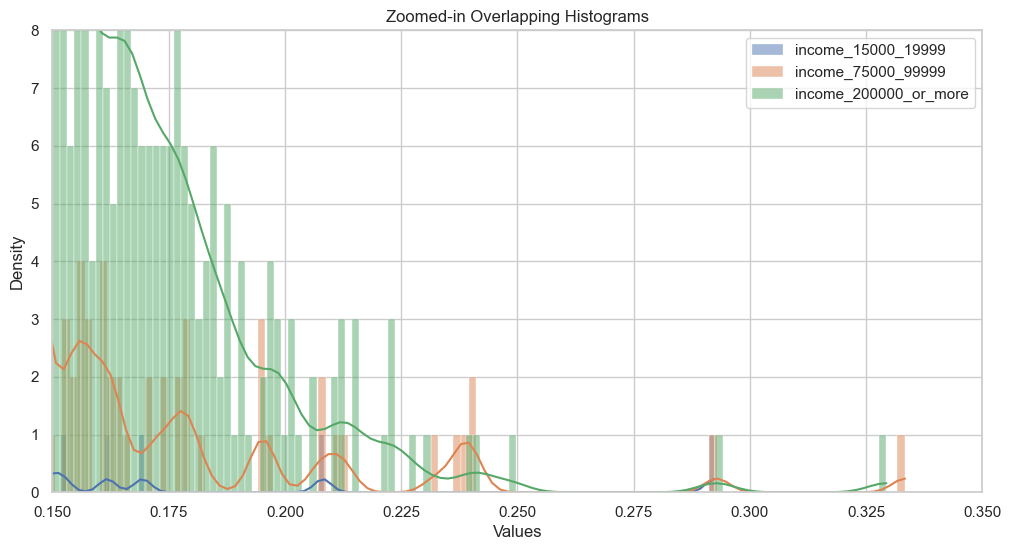

In [674]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pick the columns to plot
columns_to_plot = ['income_15000_19999', 'income_75000_99999', 'income_200000_or_more']

# Create a figure and axis for the plot
plt.figure(figsize=(12, 6))

# Loop through the selected columns and plot their histograms with transparency
for column in columns_to_plot:
    sns.histplot(df_top_nulls_dropped[column], label=column, kde=True, alpha=0.5)

# Customize the plot
plt.title('Zoomed-in Overlapping Histograms')
plt.xlabel('Values')
plt.ylabel('Density')

# Set the x-axis and y-axis limits to zoom in closely
plt.xlim(0.15, 0.35)
plt.ylim(0, 8)  # Adjust the y-axis limit to make it appear "super low"

# Add a legend to distinguish between the columns
plt.legend()

# Show the plot
plt.show()



### It Does Seem So. Let's Check Another Assumption - Poverty + Single Parent Households

It does seem like high-earners are right skewed. 

Now, let's dig into poverty, since this is commonly held to be a key driver of crime. What about single female households? What about single male households? Let's make scatterplots to test these assumptions. 

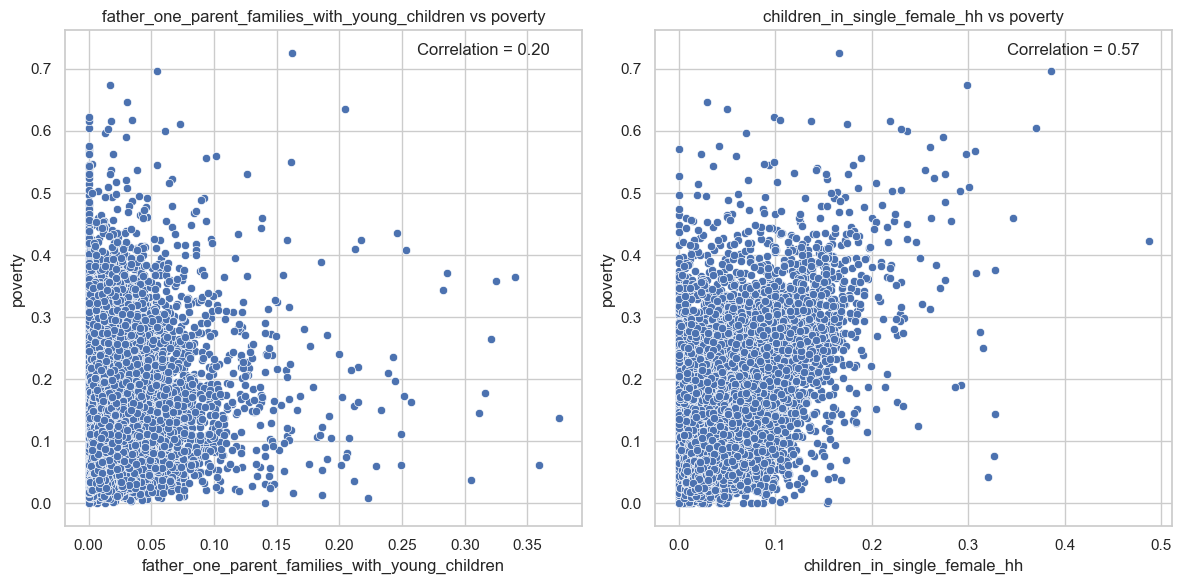

In [675]:
# Define the three columns you want to compare
x_column1 = 'father_one_parent_families_with_young_children'
x_column2 = 'children_in_single_female_hh'
y_column = 'poverty' #households_public_asst_or_food_stamps

# Create two side-by-side scatter plots
plt.figure(figsize=(12, 6))

# First scatter plot
plt.subplot(1, 2, 1)
sns.scatterplot(data=df_top_nulls_dropped, x=x_column1, y=y_column)

# Calculate the correlation coefficient
correlation_coefficient1 = df_top_nulls_dropped[[x_column1, y_column]].corr().iloc[0, 1]
plt.title(f'{x_column1} vs {y_column}')

# Display the correlation coefficient on the plot (upper right, more to the left)
plt.text(0.68, 0.95, f'Correlation = {correlation_coefficient1:.2f}', transform=plt.gca().transAxes, fontsize=12)

# Second scatter plot
plt.subplot(1, 2, 2)
sns.scatterplot(data=df_top_nulls_dropped, x=x_column2, y=y_column)

# Calculate the correlation coefficient
correlation_coefficient2 = df_top_nulls_dropped[[x_column2, y_column]].corr().iloc[0, 1]
plt.title(f'{x_column2} vs {y_column}')

# Display the correlation coefficient on the plot (upper right, more to the left)
plt.text(0.68, 0.95, f'Correlation = {correlation_coefficient2:.2f}', transform=plt.gca().transAxes, fontsize=12)

# Adjust spacing between plots
plt.tight_layout()

# Show the plots
plt.show()



### Intersting, but Check Assumptions

It seems like single mother households are much more correlated with poverty (almost twice as much) as single father households. But that assumes that we are correctly interpreting the single father households. 

### Sanity Check - Bachelors vs. Masters Degree Correlation 

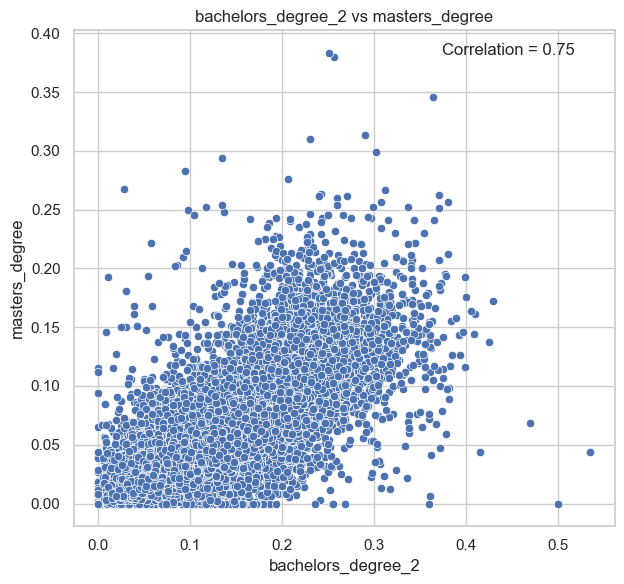

In [676]:


# Define the three columns you want to compare
x_column1 = 'bachelors_degree_2'
y_column = 'masters_degree' 

# Create two side-by-side scatter plots
plt.figure(figsize=(12, 6))

# First scatter plot
plt.subplot(1, 2, 1)
sns.scatterplot(data=df_top_nulls_dropped, x=x_column1, y=y_column)

# Calculate the correlation coefficient
correlation_coefficient1 = df_top_nulls_dropped[[x_column1, y_column]].corr().iloc[0, 1]
plt.title(f'{x_column1} vs {y_column}')

# Display the correlation coefficient on the plot (upper right, more to the left)
plt.text(0.68, 0.95, f'Correlation = {correlation_coefficient1:.2f}', transform=plt.gca().transAxes, fontsize=12)

# Adjust spacing between plots
plt.tight_layout()

# Show the plots
plt.show()

### Sanity Check Confirmed - What About Rent? 

How is rent distributed? How much do people spend on rent? Let's construct a box plot. 

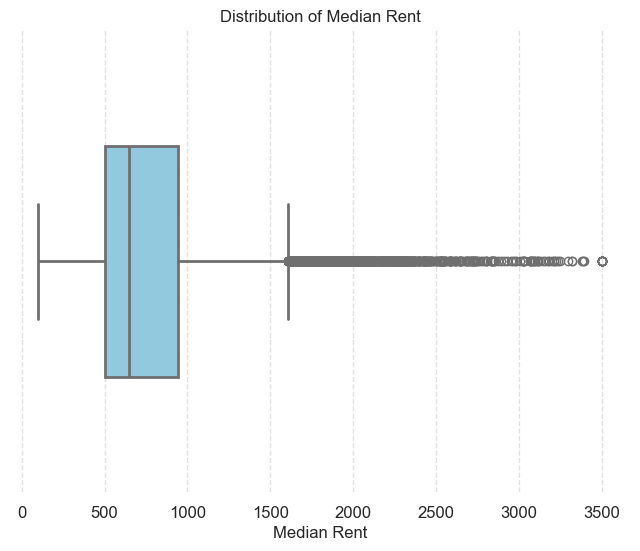

In [677]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the plot
sns.set(style="whitegrid")

# Create a beautiful boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_top_nulls_dropped['median_rent'], color='skyblue', width=0.5, linewidth=2)

# Add title and labels
plt.title("Distribution of Median Rent")
plt.xlabel("Median Rent")
plt.ylabel("")

# Customize the axis labels
plt.xticks(fontsize=12)
plt.yticks([])  # Hide the y-axis labels

# Add some additional styling
sns.despine(left=True, bottom=True)
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Show the plot
plt.show()


### What about the "Old Money" Hypothesis? 

Let's see if there's any correlation (or a negative one) between the age of structures and proportion of million dollar homes. 

The idea is, the older the median structure, the more million dollar homes there are. 

First let's derive it, then let's check it. 

In [678]:
df_top_nulls_dropped['ages_of_structures'] = 2020 - df_top_nulls_dropped['median_year_structure_built']

/var/folders/xk/6lsn06011s98nzxmgzk8ptc00000gn/T/ipykernel_10916/222510887.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_top_nulls_dropped['ages_of_structures'] = 2020 - df_top_nulls_dropped['median_year_structure_built']


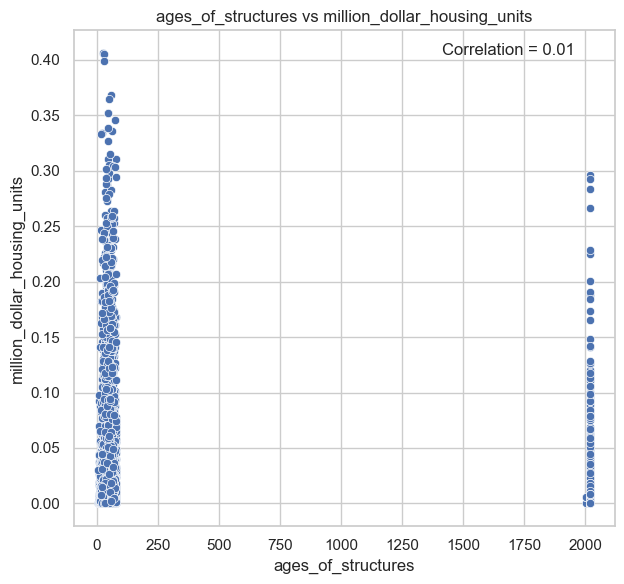

In [679]:
# Define the three columns you want to compare
x_column1 = 'ages_of_structures'
y_column = 'million_dollar_housing_units' 

# Create two side-by-side scatter plots
plt.figure(figsize=(12, 6))

# First scatter plot
plt.subplot(1, 2, 1)
sns.scatterplot(data=df_top_nulls_dropped, x=x_column1, y=y_column)

# Calculate the correlation coefficient
correlation_coefficient1 = df_top_nulls_dropped[[x_column1, y_column]].corr().iloc[0, 1]
plt.title(f'{x_column1} vs {y_column}')

# Display the correlation coefficient on the plot (upper right, more to the left)
plt.text(0.68, 0.95, f'Correlation = {correlation_coefficient1:.2f}', transform=plt.gca().transAxes, fontsize=12)

# Adjust spacing between plots
plt.tight_layout()

# Show the plots
plt.show()

### More Dirty Data! Let's Clean it...

It seems like there's some dirty data! Unless these homes are older then Christ, they might have been miscoded. Let's temporarily drop rows where home values are older than the United States. 

In [680]:
df_recent_structures = df_top_nulls_dropped[df_top_nulls_dropped['ages_of_structures'] <= 350]

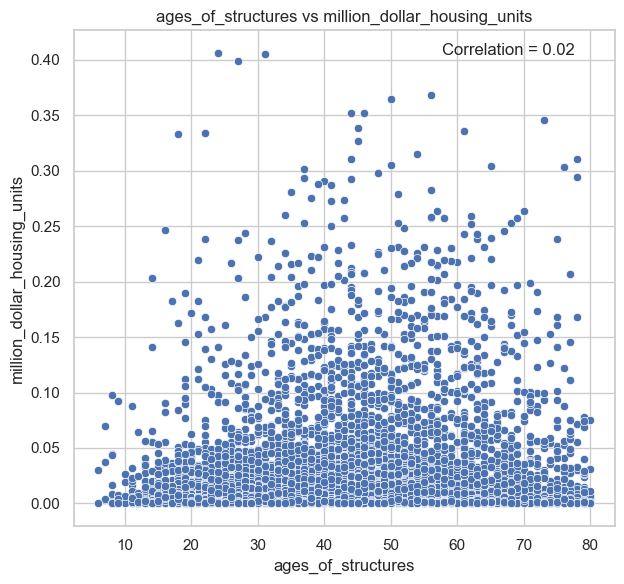

In [681]:
# Define the three columns you want to compare
x_column1 = 'ages_of_structures'
y_column = 'million_dollar_housing_units' 

# Create two side-by-side scatter plots
plt.figure(figsize=(12, 6))

# First scatter plot
plt.subplot(1, 2, 1)
sns.scatterplot(data=df_recent_structures, x=x_column1, y=y_column)

# Calculate the correlation coefficient
correlation_coefficient1 = df_recent_structures[[x_column1, y_column]].corr().iloc[0, 1]
plt.title(f'{x_column1} vs {y_column}')

# Display the correlation coefficient on the plot (upper right, more to the left)
plt.text(0.68, 0.95, f'Correlation = {correlation_coefficient1:.2f}', transform=plt.gca().transAxes, fontsize=12)

# Adjust spacing between plots
plt.tight_layout()

# Show the plots
plt.show()

### Let's Reciprocal Transform Structure Age (to nerf the extreme outliers) 

Instead of dropping these rows altogether and losing all that data, let's reciprocal transform it so that extreme values are less extreme! We'll check the distribution after.

In [682]:
df_top_nulls_dropped['ages_of_structures_transformed'] = df_top_nulls_dropped['ages_of_structures'] = 1 / (df_top_nulls_dropped['ages_of_structures'])


/var/folders/xk/6lsn06011s98nzxmgzk8ptc00000gn/T/ipykernel_10916/1450513916.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_top_nulls_dropped['ages_of_structures_transformed'] = df_top_nulls_dropped['ages_of_structures'] = 1 / (df_top_nulls_dropped['ages_of_structures'])


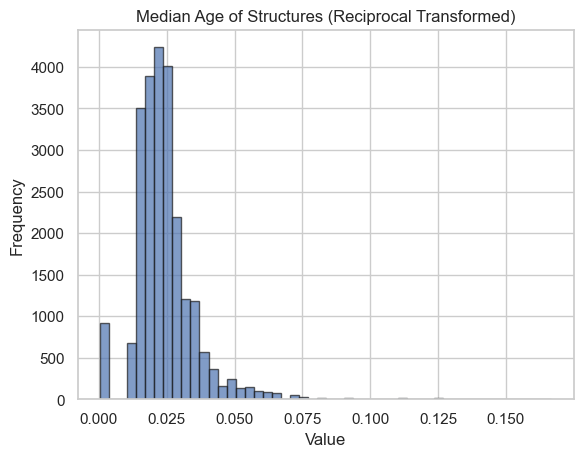

In [683]:
# Create a histogram
plt.hist(df_top_nulls_dropped['ages_of_structures_transformed'], bins=50, edgecolor='k', alpha=0.7)

# Add labels and a title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Median Age of Structures (Reciprocal Transformed)')

# Show the histogram
plt.show()

### We're done! (for now) - let's export the data to CSV 

Whew! We're done analyzing the data for now. There's over 200 variables, so its hard to go through them manually and catch all the mistakes. We also don't want to drop any zip codes unecessarily with a lot of good data - each one has a lot of valuable insight into. 

One more thing: 

- Let's drop the columns we don't need
- One more check on null values

In [684]:
df_top_nulls_dropped.isnull().sum().sort_values(ascending=False) # Get null counts per column 

geo_id                                                            0
management_business_sci_arts_employed                             0
male_55_to_59                                                     0
male_5_to_9                                                       0
male_60_to_61                                                     0
male_62_to_64                                                     0
male_65_to_66                                                     0
male_67_to_69                                                     0
male_70_to_74                                                     0
male_75_to_79                                                     0
male_80_to_84                                                     0
male_85_and_over                                                  0
male_pop                                                          0
male_under_5                                                      0
married_households                              

In [685]:
#Drop the columns we don't need
df_top_nulls_dropped.drop(columns = ['median_year_structure_built'], inplace=True)
df_top_nulls_dropped.drop(columns = ['ages_of_structures'], inplace=True)

### Final Check - Join in Crime Data

Let's join in the crime data and see how effective the join is: 

In [686]:
crime_df = pd.read_csv('data/Overall_Summary_CrimeRate_byZip.csv')

test_df = pd.merge(df_top_nulls_dropped, crime_df, how='inner', left_on='geo_id', right_on='Place')
print(len(df_top_nulls_dropped))
print(len(test_df))

23872
23796


### Very Effective - Now, Left Join

In [687]:
final_df = pd.merge(df_top_nulls_dropped, crime_df, how='left', left_on='geo_id', right_on='Place')

### One More Null Count Check

In [688]:
final_df.isnull().sum().sort_values(ascending=False) # Get null counts per column 

Summary_Overall_PerThousand                                       76
State                                                             76
Place                                                             76
management_business_sci_arts_employed                              0
male_55_to_59                                                      0
male_5_to_9                                                        0
male_60_to_61                                                      0
male_62_to_64                                                      0
male_65_to_66                                                      0
male_67_to_69                                                      0
male_70_to_74                                                      0
male_75_to_79                                                      0
male_80_to_84                                                      0
male_85_and_over                                                   0
male_pop                          

### Drop Records Where Null

In [689]:
final_df = final_df.dropna()

In [690]:
print(len(final_df))

23796


### Save to CSV

In [691]:
final_df.to_csv('data/cleaned_demographic_data.csv', index=False)